## **Exploratory Data Analysis (EDA)  for Cleantech media dataset.  (MAHA)**







In the Exploratory Data Analysis (EDA) section for the Cleantech media dataset, we conduct a thorough investigation to understand its composition and trends. Through general text statistics, temporal analysis, word frequency examination, word cloud visualization, and sentiment analysis, we o unveil key insights into Cleantech media discourse.



In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CLT/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CLT


## Import Libraries


In [4]:
#!pip install pandas numpy matplotlib seaborn nltk textblob scikit-learn top2vec bertopic wordcloud


!pip install bertopic
!pip install gensim
!pip install top2vec
!pip install pyLDAvis



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 13.1 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [5]:
# Libraries for feature extraction and topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from bertopic import BERTopic
from gensim.models import CoherenceModel
from top2vec import Top2Vec
from nltk.util import ngrams

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Libraries for text processing and NLP
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning and topic modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Visualization
from wordcloud import WordCloud

import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


## Load the Dataset

Load the preprocessed cleantech media dataset

In [6]:
# Load the dataset
file_path = '/content/drive/My Drive/CLT/cleantech_media_dataset_cleaned.csv'
media_data = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Dataset Overview

In [ ]:
# Display the first few rows and the data structure to understand what we have
media_data.info(), media_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 9593 non-null   object
 1   date                  9593 non-null   object
 2   content               9593 non-null   object
 3   domain                9593 non-null   object
 4   url                   9593 non-null   object
 5   title_preprocessed    9593 non-null   object
 6   content_preprocessed  9593 non-null   object
dtypes: object(7)
memory usage: 524.7+ KB


(None,
                                                title        date  \
 0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
 1               India Launches Its First 700 MW PHWR  2021-01-15   
 2              New Chapter for US-China Energy Trade  2021-01-20   
 3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
 4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   
 
                                              content       domain  \
 0  Qatar Petroleum ( QP) is targeting aggressive ...  energyintel   
 1  • Nuclear Power Corp. of India Ltd. ( NPCIL) s...  energyintel   
 2  New US President Joe Biden took office this we...  energyintel   
 3  The slow pace of Japanese reactor restarts con...  energyintel   
 4  Two of New York City's largest pension funds s...  energyintel   
 
                                                  url  \
 0  https://www.energyintel.com/0000017b-a7dc-de4c...   
 1  https://www.energyintel.com/0000017b-

The media_data consists of 7 columns and 9593 entries. Here are the columns present:

- title: The title of the media article.
- date: The publication date of the article.
- content: The full content of the media article.
- domain: The domain from which the article was sourced.
- url: The URL of the article.
- title_preprocessed: The preprocessed text of the title.
- content_preprocessed: The preprocessed text of the content.

Each column contains non-null values, indicating that the dataset is already cleaned in terms of missing values. The title_preprocessed and content_preprocessed columns suggest that some text preprocessing has already been performed.


### General Text Statistics

We'll compute:

- Average word count of titles and contents.
- Distribution of article lengths.
- The most common words before diving into more complex analysis like sentiment and topics

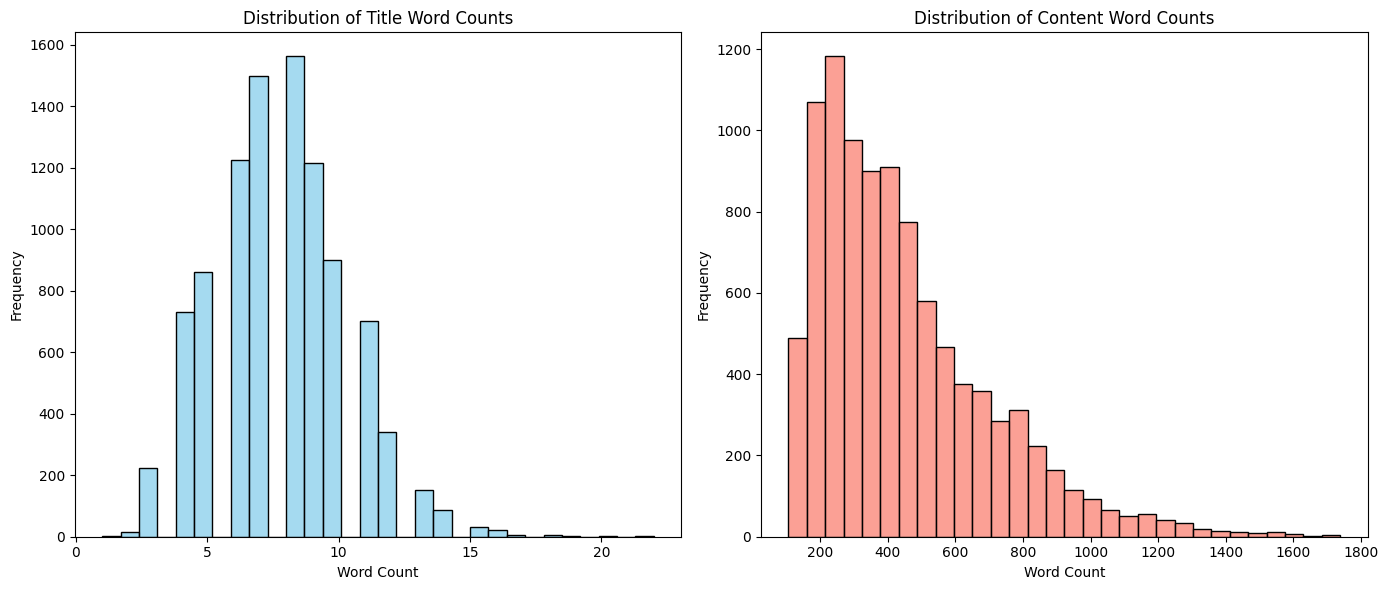

(count    9593.000000
 mean        7.760346
 std         2.501793
 min         1.000000
 25%         6.000000
 50%         8.000000
 75%         9.000000
 max        22.000000
 Name: word_count_title, dtype: float64,
 count    9593.000000
 mean      450.009903
 std       255.596109
 min       107.000000
 25%       254.000000
 50%       390.000000
 75%       578.000000
 max      1738.000000
 Name: word_count_content, dtype: float64)

In [ ]:
# Basic text statistics
media_data['word_count_title'] = media_data['title_preprocessed'].apply(lambda x: len(x.split()))
media_data['word_count_content'] = media_data['content_preprocessed'].apply(lambda x: len(x.split()))

# Plotting the distribution of word counts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(media_data['word_count_title'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Title Word Counts')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

sns.histplot(media_data['word_count_content'], bins=30, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Content Word Counts')
ax[1].set_xlabel('Word Count')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and display basic statistics
title_stats = media_data['word_count_title'].describe()
content_stats = media_data['word_count_content'].describe()

title_stats, content_stats


Titles:

- Average word count: 7.76 words
- Standard deviation: 2.50 words
- Minimum word count: 1 word
- Maximum word count: 22 words
- The titles in media_data tend to be concise, averaging around 8 words per title.
- The histogram shows a fairly consistent distribution, with most titles containing between 6 to 9 words.

Content:

- Average word count: 450 words
- Standard deviation: 256 words
- Minimum word count: 107 words
- Maximum word count: 1738 words
- The content of the articles is considerably longer, as expected, with a significant variation in length.
- Most articles range around 390 to 578 words, with some articles extending beyond 1000 words, indicating more detailed discussions.

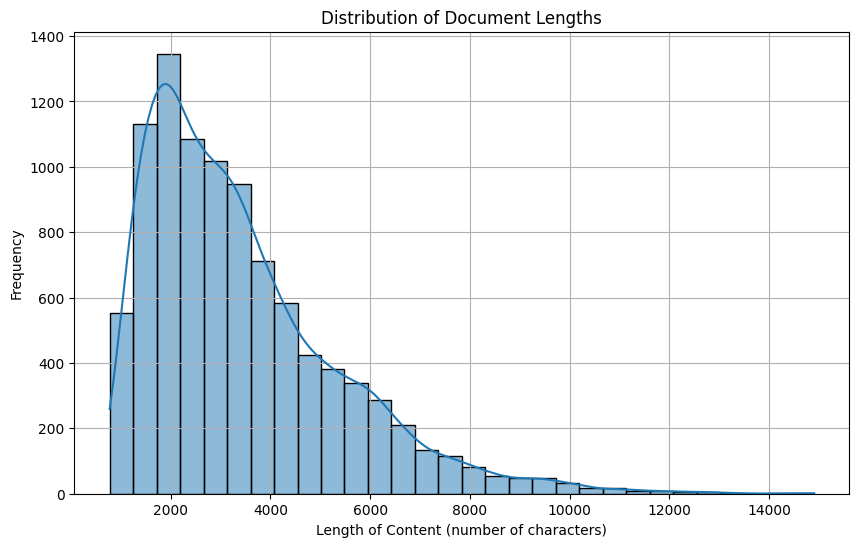

In [ ]:
# Calculate the length of each document
media_data['content_length'] = media_data['content_preprocessed'].apply(len)

# Plot the distribution of document lengths
plt.figure(figsize=(10, 6))
sns.histplot(media_data['content_length'], bins=30, kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Length of Content (number of characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram above shows the distribution of document lengths in terms of the number of characters in the preprocessed content. The distribution appears to be skewed right, indicating that most articles are of a moderate length, with fewer articles being significantly longer.

## Number of Articles Over Time


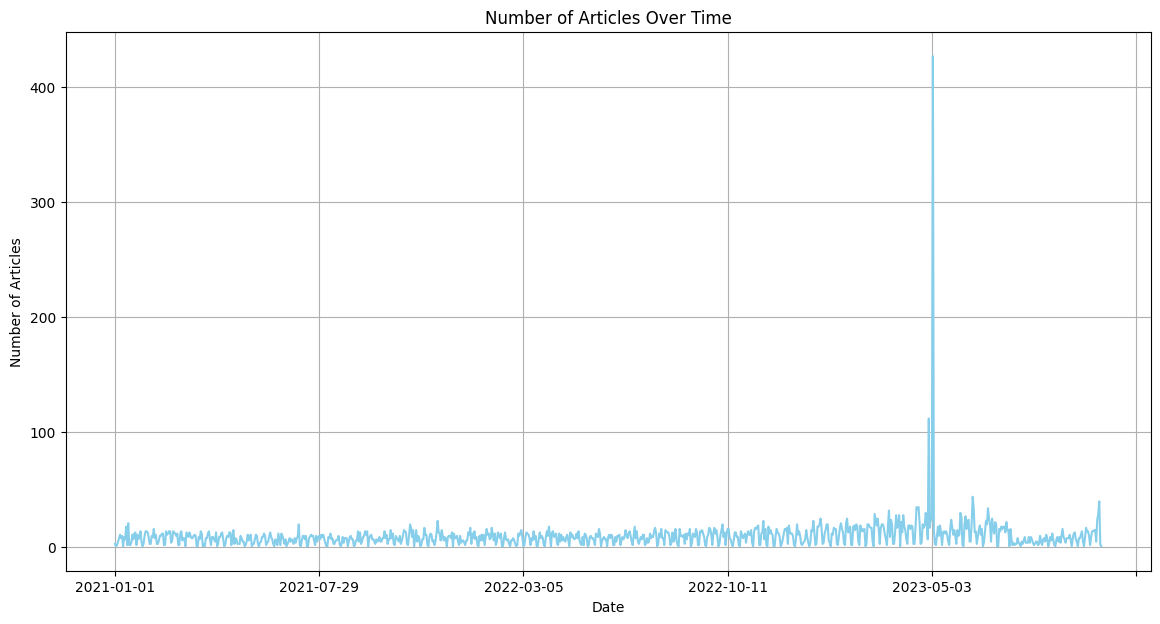

In [ ]:
# Convert 'date' to datetime format for time series analysis
# media_data['date'] = pd.to_datetime(media_data['date'])

# Preparing data for plotting
date_counts = media_data['date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
date_counts.plot(title='Number of Articles Over Time', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


The plot above displays the distribution of articles over time. It provides a visual understanding of how frequently articles are published within the dataset's timeframe. Such trends can indicate periods of high activity or interest in certain cleantech topics.

## Word Frequency Analysis


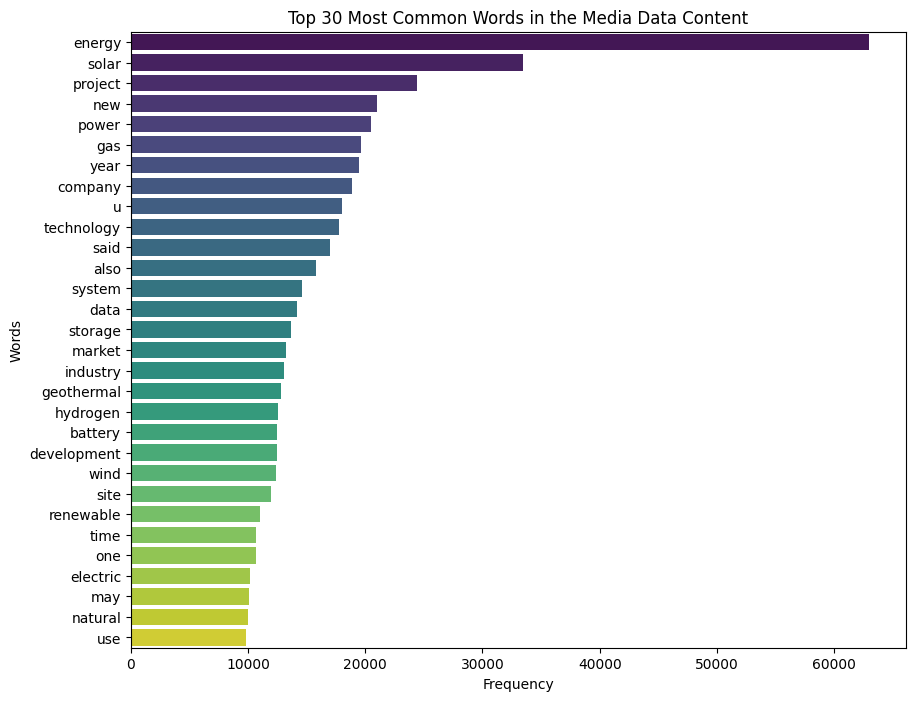

In [ ]:
# Function to count word frequency
def count_words(text_series):
    word_counts = Counter()
    for text in text_series:
        word_counts.update(text.split())
    return word_counts

# Count words in the preprocessed content
word_freq = count_words(media_data['content_preprocessed'])

# Convert to a DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=['word', 'frequency'])

# Plotting the top 30 words
plt.figure(figsize=(10, 8))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')
plt.title('Top 30 Most Common Words in the Media Data Content')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


The bar plot above shows the top 30 most common words in the content_preprocessed of media_data. These words reflect the key topics and frequent terms used within the articles.

## Bigram Analysis


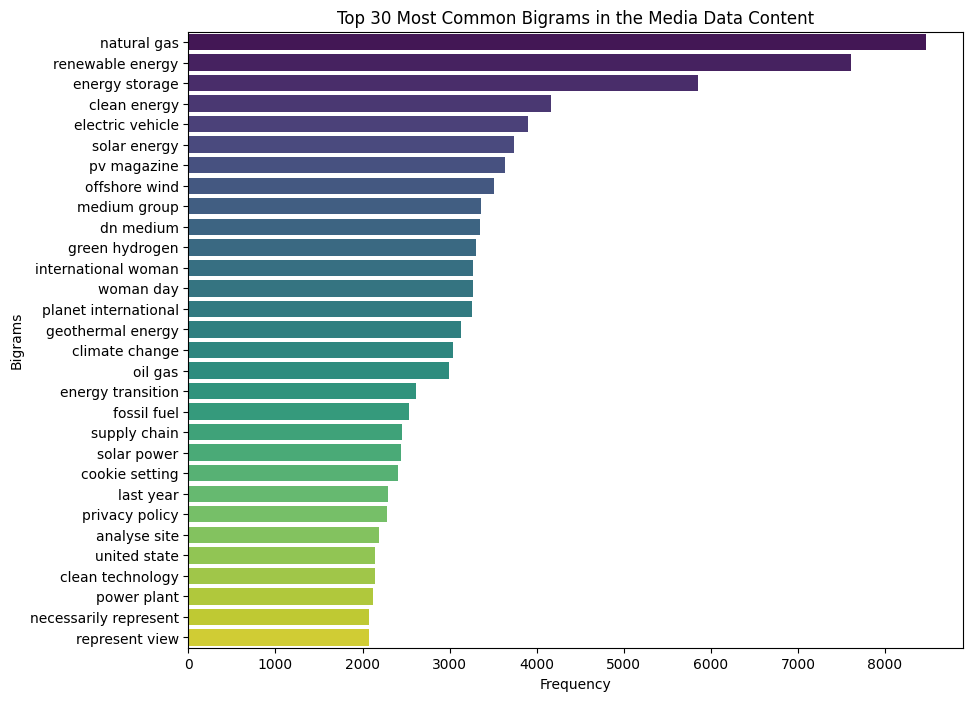

In [ ]:
# Function to count bigrams
def count_bigrams(text_series):
    bigram_counts = Counter()
    for text in text_series:
        bigrams = ngrams(text.split(), 2)
        bigram_counts.update(bigrams)
    return bigram_counts

# Count bigrams in the preprocessed content
bigram_freq = count_bigrams(media_data['content_preprocessed'])


# Convert to a DataFrame for visualization
bigram_freq_df = pd.DataFrame(bigram_freq.most_common(30), columns=['bigram', 'frequency'])
bigram_freq_df['bigram'] = bigram_freq_df['bigram'].apply(lambda x: ' '.join(x))

# Plotting the top 30 bigrams
plt.figure(figsize=(10, 8))
sns.barplot(x='frequency', y='bigram', data=bigram_freq_df, palette='viridis')
plt.title('Top 30 Most Common Bigrams in the Media Data Content')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

The bar plot displays the top 30 most common bigrams found in the content_preprocessed of media_data. These bigrams provide insight into frequently discussed pairs of words, which often indicate key topics or combined concepts in the articles.

## Word Cloud

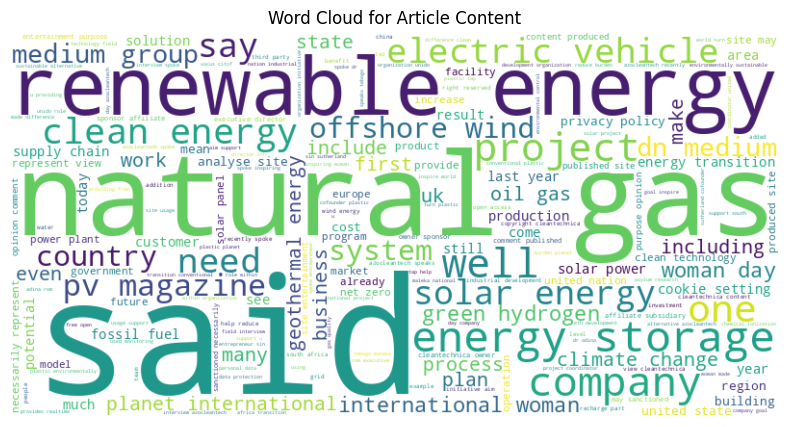

In [ ]:
# Generate a word cloud for the 'content_preprocessed'
content_text = ' '.join(media_data['content_preprocessed'].dropna())
wordcloud_content = WordCloud(width=800, height=400, background_color='white').generate(content_text)

# Display the word cloud for content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Article Content')
plt.show()


The word cloud from the cleantech article dataset reveals a strong emphasis on sustainable energy and environmental technology. Key topics such as renewable energy sources, including solar and wind power, dominate the conversation. There's a clear focus on innovation, as evidenced by terms like "storage," "electric vehicle," and "hydrogen," pointing to discussions on advancing energy storage and clean transportation.

Climate change remains a pivotal theme, likely driving much of the content and solutions discussed. Additionally, the presence of words related to policy and governance indicates that regulatory frameworks and national strategies are significant in the cleantech narrative.

In essence, the dataset captures a comprehensive dialogue on cleantech, encompassing technology, sustainability, policy, and the move towards a greener future.

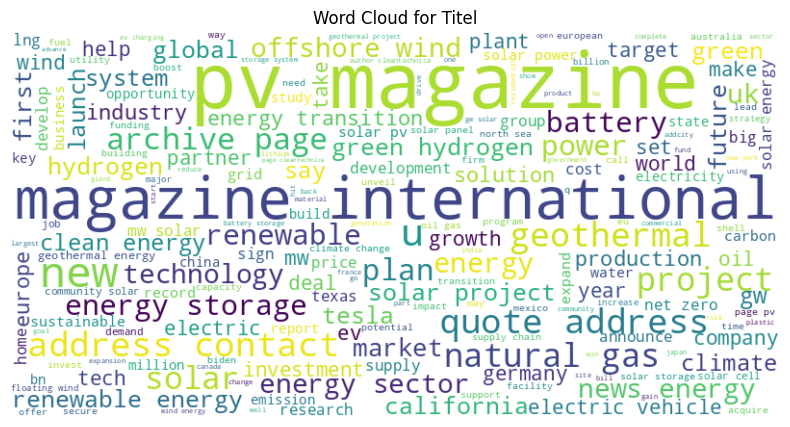

In [ ]:
# Generate a word cloud for the 'content_preprocessed'
content_text = ' '.join(media_data['title_preprocessed'].dropna())
wordcloud_content = WordCloud(width=800, height=400, background_color='white').generate(content_text)

# Display the word cloud for content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titel')
plt.show()

This word cloud from article titles in the cleantech dataset emphasizes renewable energy technologies, particularly solar and wind power, suggesting these are central topics in the sector. Terms like "green," "storage," and "battery" indicate a focus on sustainable solutions and the importance of energy storage. "Hydrogen" and "electric vehicle" point to clean transportation discussions. The presence of "climate change," "carbon," and "emission" reflects environmental impact concerns, while words such as "global," "international," and names of countries like "UK" and "India" suggest a worldwide scope and interest. "Investment," "market," and "sector" highlight the economic and business dimensions of cleantech. Overall, the titles focus on innovation, environmental solutions, and market developments in the cleantech industry.

## Sentiment Analysis

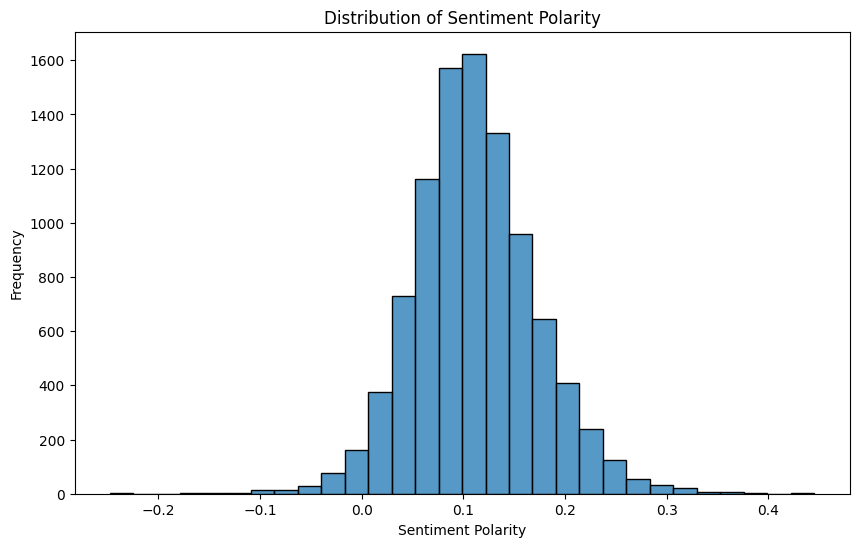

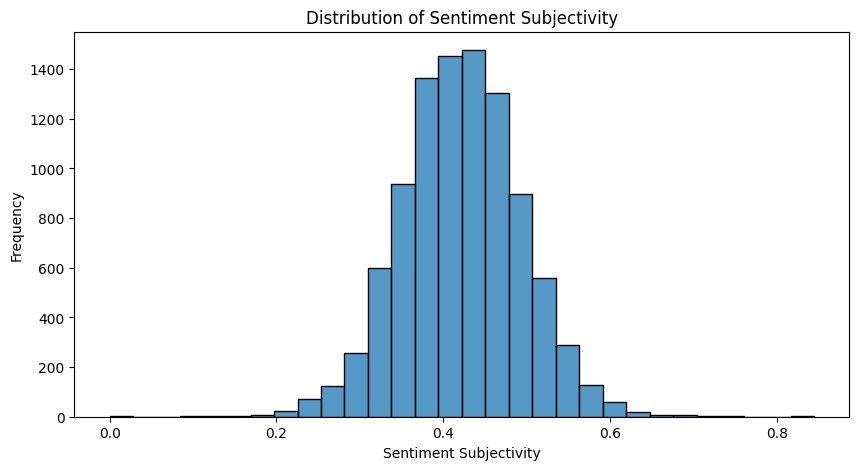

In [ ]:
# Function to calculate sentiment polarity and subjectivity
def calculate_sentiment(text):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Calculate sentiment polarity and subjectivity for each article
media_data['sentiment_polarity'], media_data['sentiment_subjectivity'] = zip(*media_data['content_preprocessed'].apply(calculate_sentiment))

# Plot the distribution of sentiment polarities
plt.figure(figsize=(10, 6))
sns.histplot(media_data['sentiment_polarity'], bins=30, kde=False)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of sentiment subjectivities
plt.figure(figsize=(10, 5))
sns.histplot(media_data['sentiment_subjectivity'], bins=30, kde=False)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()


- The sentiment polarity histogram indicates the emotional tone across the articles. The polarity scores range from -1 (very negative) to +1 (very positive). Most articles cluster around a sentiment polarity near zero, suggesting a neutral tone, which is typical for professional or technical writing. However, there's a noticeable spread across both positive and negative values, showing some variation in tone.

- The sentiment subjectivity histogram displays a moderate level of subjectivity, peaking around the middle of the scale. This indicates that the articles tend to mix objective facts with subjective opinions, rather than being strongly objective or strongly opinionated.

# **# Topic Modeling for Cleantech media dataset. (MAHA)**

In this section, we delve into the process of topic modeling using four distinct algorithms:
- Latent Dirichlet Allocation (LDA)
- Non-Negative Matrix Factorization (NMF)
- Top2Vec
- BERTopic

Each algorithm offers unique insights into the underlying structures of our media dataset, allowing us to uncover latent themes and patterns. By comparing the results obtained from these models, we aim to discern the most effective approach for capturing the diverse topics present in media publication


##  **Exploring Latent Topics with Latent Dirichlet Allocation (LDA)**



In this subsection, we delve into Latent Dirichlet Allocation (LDA), a foundational probabilistic model widely used for identifying latent topics within a corpus.


In [ ]:
# Function to display topics from LDA model and return them in a DataFrame
def display_topics(model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words = model.show_topic(i, topn=20)
        word_dict['Topic # ' + '{:02d}'.format(i + 1)] = [word for word, prob in words]
    return pd.DataFrame(word_dict)

# Preparing the text data
text_data = media_data['content_preprocessed']

# Tokenization for Gensim
texts = [doc.split() for doc in text_data]  # Split the text data into tokens
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA model using Gensim
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10,
                     random_state=100, update_every=1, chunksize=500,
                     passes=10, alpha='auto', per_word_topics=True)

# Display topics
topic_table = display_topics(lda_model, lda_model.num_topics)
print(topic_table)



       Topic # 01   Topic # 02    Topic # 03 Topic # 04 Topic # 05  \
0              ev       energy        market        ipp       year   
1        electric        solar        europe        neo          u   
2         vehicle      project          sale       afdb       said   
3   cleantechnica        power         share  tendering      would   
4        charging   geothermal      european       taqa     energy   
5           tesla      storage         model      alpha     market   
6             car    renewable          year  rajasthan       also   
7             get       system         month    mohamed        new   
8             one        state       vehicle    charlie    climate   
9            site    community       germany      stena      could   
10        company          new      electric    topside     supply   
11        lithium        clean        france   manifold   industry   
12          owner         grid  registration     gannet      price   
13           time  e

This table displays the top ten words from each of the ten topics identified through Latent Dirichlet Allocation (LDA) in the cleantech media dataset. The words in each column represent the most significant and frequently occurring terms associated with each topic. Here’s an interpretation of the potential themes or subjects these topics could represent based on the keywords listed:

Topic Interpretations:
- Topic 01 - General Cleantech Interest and Public Engagement: Focuses on broad cleantech themes, discussions about technology acceptance and societal involvement, as indicated by words like "new," "like," "people," and "company."
- Topic 02 - Oil and Gas Sector Analysis: Emphasizes fossil fuel topics, particularly natural gas and oil, discussing aspects such as pricing, market dynamics, and news updates.
- Topic 03 - Geothermal Energy Development: Centers on geothermal energy projects, covering aspects from project development to technological applications and resource management.
- Topic 04 - Solar Power and Renewable Energy Initiatives: Deals with solar energy and broader renewable projects, highlighting themes around power production, project development, and industry innovations.
- Topic 05 - Battery Technology and Innovation: Discusses advancements in battery technology and energy storage solutions, highlighting key components like cells and materials used.
- Topic 06 - Research and Development in Cleantech: Focuses on diverse technological advancements and research, potentially covering international efforts and contributions to the cleantech sector.
- Topic 07 - Energy Policies and Climate Initiatives: Talks about global and national energy policies, climate change initiatives, and the investment landscape affecting the cleantech industry.
- Topic 08 - Data Privacy and Solar Technology: Likely relates to issues surrounding data privacy and management, especially in the context of solar energy technologies.
- Topic 09 - Hydrogen and Wind Energy Projects: Focuses on renewable energy development, specifically hydrogen and wind energy projects, and their integration into green initiatives.
- Topic 10 - Electric Vehicles and Market Dynamics: Centers on the electric vehicle market, covering topics from consumer models and market sales to significant players like Tesla.

**Coherence Score for LDA**

In [ ]:
 # Define a function to compute the coherence score for a given model
def compute_coherence_score(model, texts, dictionary, coherence='c_v'):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Compute Coherence Score
lda_coherence = compute_coherence_score(lda_model, texts, dictionary)
print("Coherence Score for LDA: ", lda_coherence)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score for LDA:  0.5027591595884999


The Latent Dirichlet Allocation (LDA) model's coherence score of 0.5027591595884999 indicates the degree of semantic similarity between the words within the topics generated by the model. A coherence score above 0.5 suggests that the topics are reasonably coherent, meaning that the words within each topic tend to be related to each other in a meaningful way but there is room for improvement to make them more coherent and meaningful. Further refinement of the model parameters or preprocessing steps may enhance the quality of the extracted topics.

**Visualizing LDA topics using pyLDAvis**


In [ ]:
# Visualize the topics using pyLDAvis
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


pyLDAvis provides an interactive chart where each bubble represents a topic. The size of the bubble indicates the prevalence of the topic across the corpus. Words that are most relevant to each topic are displayed on the right, helping you understand the theme or content of each topic.

## **Uncovering Latent Patterns with Non-Negative Matrix Factorization (NMF):**

 Here, we introduce Non-Negative Matrix Factorization (NMF), a linear algebraic technique that uncovers latent topics by factorizing matrices into non-negative components.

In [ ]:
# 'text_data' is the list of preprocessed text documents
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

num_topics = 5  # You can change this based on how many topics you want to identify
num_top_words = 10  # Set the number of top words to display for each topic

nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words for each topic
print("Top words for each topic:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top words for each topic:
Topic 0:
energy solar gas power project new electric cleantechnica year said
Topic 1:
azocleantech plastic woman spoke planet interview organization international day development
Topic 2:
pv solar data website magazine module cookie setting storage deleted
Topic 3:
dn medium recharge group read wind data nhst privacy offshore
Topic 4:
geothermal energy heat project heating drilling resource development power source


**Coherence Score for NMF**

In [ ]:
# Initialize an empty list to store coherence scores
nmf_coherence_scores = []

# Generating the topic distribution matrix
topic_matrix = nmf_model.components_

# Calculate cosine similarity for coherence
similarity_matrix = cosine_similarity(topic_matrix)
np.fill_diagonal(similarity_matrix, 0)
average_similarity = np.mean(similarity_matrix)
nmf_coherence_score = 1 - average_similarity  # Coherence as inverse of average similarity

# Append the coherence score to the list
nmf_coherence_scores.append((num_topics, nmf_coherence_score))

print("Coherence Score for NMF:", nmf_coherence_scores)



Coherence Score for NMF: [(5, 0.8558676681191532)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The output indicates that the NMF model generated 5 topics, with a coherence score of approximately 0.856, suggesting that the words within each topic are closely related to each other.

In [ ]:
 # we will try different numbers of topics to find the optimal balance
num_topics_options = [10, 15, 20]
nmf_coherence = []

for num_topics in num_topics_options:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)

    # Generating the topic distribution matrix
    topic_matrix = nmf_model.components_

    # Calculate cosine similarity for coherence
    similarity_matrix = cosine_similarity(topic_matrix)
    np.fill_diagonal(similarity_matrix, 0)
    average_similarity = np.mean(similarity_matrix)
    coherence_score = 1 - average_similarity  # Coherence as inverse of average similarity

    nmf_coherence.append((num_topics, coherence_score))

print("Best_nmf_coherence_score for NMF:", nmf_coherence)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best_nmf_coherence_score for NMF: [(10, 0.8771900670645425), (15, 0.9023445304643262), (20, 0.9164268233473403)]


To check if the model could perform better, I tried different numbers of topics: 10, 15, and 20.

Results:

- Increasing to 10 topics, the coherence score improves slightly to 0.8772, indicating better topic quality.
- At 15 topics, the coherence score is further improved to 0.9023, showing more distinct and meaningful topics.
- With 20 topics, you achieve the highest coherence score of 0.9164, indicating the best semantic consistency and distinction among the topics compared to the other numbers tested.
- These results suggest that as the number of topics increases, the model is able to more effectively distinguish between different themes or subjects within the dataset, leading to a higher coherence score. This implies that more topics may help in capturing more specific or nuanced information from the dataset.


In [ ]:
# Display the top words for each topic
print("Top words for each topic:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)


Top words for each topic:
Topic 0:
solar panel community installation state program rooftop manufacturing home residential
Topic 1:
azocleantech plastic woman spoke planet interview organization international day development
Topic 2:
data website magazine pv deleted personal purpose protection party email
Topic 3:
dn medium recharge group read data nhst privacy responsible secure
Topic 4:
geothermal energy heat heating drilling resource development source potential exploration
Topic 5:
gas natural ngi lng daily price said news issn email
Topic 6:
tesla cleantechnica electric vehicle model car sale plugin zach auto
Topic 7:
hydrogen green fuel ammonia production blue gas produce steel transport
Topic 8:
wind offshore floating turbine farm gw scotland coast port onshore
Topic 9:
battery storage lithiumion lithium grid energy technology material inverter power
Topic 10:
carbon emission climate fuel capture zero reduction target dioxide global
Topic 11:
cell module efficiency manufacturing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**`Visualizing NMF Topics Manually`**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


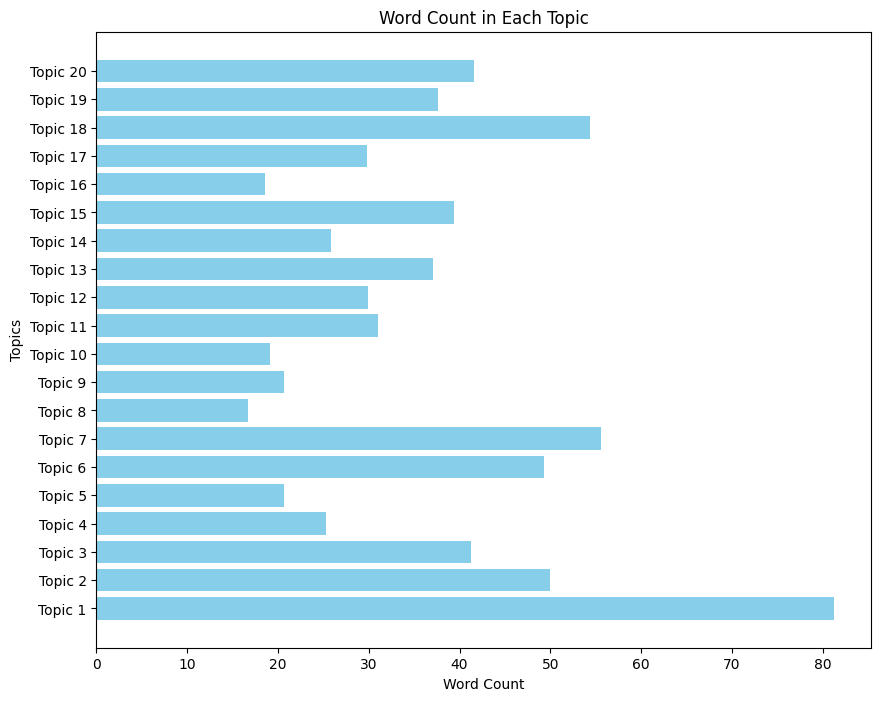

In [ ]:
# Visualizing the model
plt.figure(figsize=(10, 8))
for i, topic in enumerate(nmf_model.components_):
    plt.barh([f'Topic {i+1}'], np.sum(topic), color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Topics')
plt.title('Word Count in Each Topic')
plt.show()


This visualization provides an overview of the distribution of word counts across different topics identified by the NMF model. It helps in understanding the prominence or importance of words within each topic relative to others.

## **Discovering Semantic Similarities with Top2Vec**

In this section, we introduce Top2Vec, an unsupervised method for exploring semantic similarities in text data by dynamically clustering documents and words based on their semantic meaning.


In [ ]:
# If an error occurs, try commenting out the line of code.

#!pip uninstall tensorflow tensorflow_hub tensorflow_text top2vec
#!pip install tensorflow tensorflow_hub tensorflow_text
#!pip install top2vec[sentence_encoders]
#!pip install top2vec

In [ ]:
# Load the data
text_data = media_data['content_preprocessed'].dropna().values.tolist()

# Adjust the sample_size parameter as needed
sample_size = 1000
text_data_sample = text_data[:sample_size]

# Adjust the workers parameter to utilize parallel processing
# we can experiment with different values to find the optimal setting
workers = 4

# Initialize Top2Vec model
top2vec_model = Top2Vec(documents=text_data_sample, workers=workers)

# Get the number of topics
num_topics = top2vec_model.get_num_topics()
print("Number of topics:", num_topics)

2024-04-27 20:57:25,059 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-04-27 20:57:26,346 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-04-27 20:57:29,068 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-27 20:58:28,185 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-27 20:58:42,341 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-27 20:58:42,379 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Number of topics: 11


In [ ]:
#explore the topics
topics_words, word_scores, topic_nums = top2vec_model.get_topics()
for topic in topic_nums:
    print("\nTopic", topic)
    print("Words:", topics_words[topic])



Topic 0
Words: ['offshore' 'wind' 'renewables' 'renewable' 'onshore' 'harbour'
 'totalenergies' 'project' 'energy' 'maritime' 'solar' 'proposal' 'ocean'
 'scotwind' 'geothermal' 'pledge' 'turbine' 'grant' 'pledged' 'greener'
 'exxon' 'gulf' 'potential' 'investor' 'incentive' 'generator' 'nuclear'
 'scotland' 'sea' 'promising' 'sustainable' 'environmental' 'coast'
 'refinery' 'sustainability' 'prospect' 'oilfield' 'seabed' 'wave'
 'interest' 'viable' 'initiative' 'investing' 'oil' 'shetland' 'subsidy'
 'invested' 'invest' 'subsea' 'infrastructure']

Topic 1
Words: ['offshore' 'oilfield' 'renewables' 'gulf' 'exxon' 'refinery' 'onshore'
 'petroleum' 'oil' 'geothermal' 'environmental' 'pipeline' 'ambitious'
 'solar' 'gas' 'totalenergies' 'ocean' 'invested' 'potential' 'renewable'
 'wind' 'ambition' 'northeast' 'investor' 'expect' 'project' 'exploration'
 'drilling' 'sustainable' 'promising' 'environment' 'fuel' 'expects'
 'prospect' 'expectation' 'investing' 'investment' 'wave' 'sustainab

**Coherence Score for Top2Vec**

In [ ]:
# Create a Gensim Dictionary from the list of topic words
dictionary = Dictionary(topics_words)

# Convert the list of topic words to a bag-of-words format for coherence calculation
corpus = [dictionary.doc2bow(topic) for topic in topics_words]

# Assuming 'text_data_sample' contains the original documents corresponding to the topics
texts = [doc.split() for doc in text_data_sample]  # Ensure texts are tokenized if not already

# Initialize and compute the coherence model
coherence_model = CoherenceModel(topics=topics_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score for Top2Vec: ", coherence_score)

The coherence score of approximately 0.300 suggests that the topics generated by the Top2Vec model exhibit moderate coherence. While not exceptionally high, this score indicates a reasonable level of semantic coherence among the extracted topics. Further refinement or exploration may be necessary to improve the coherence of the generated topics for enhanced interpretability and utility in downstream applications

**Visualizing Topics with Top2Vec**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


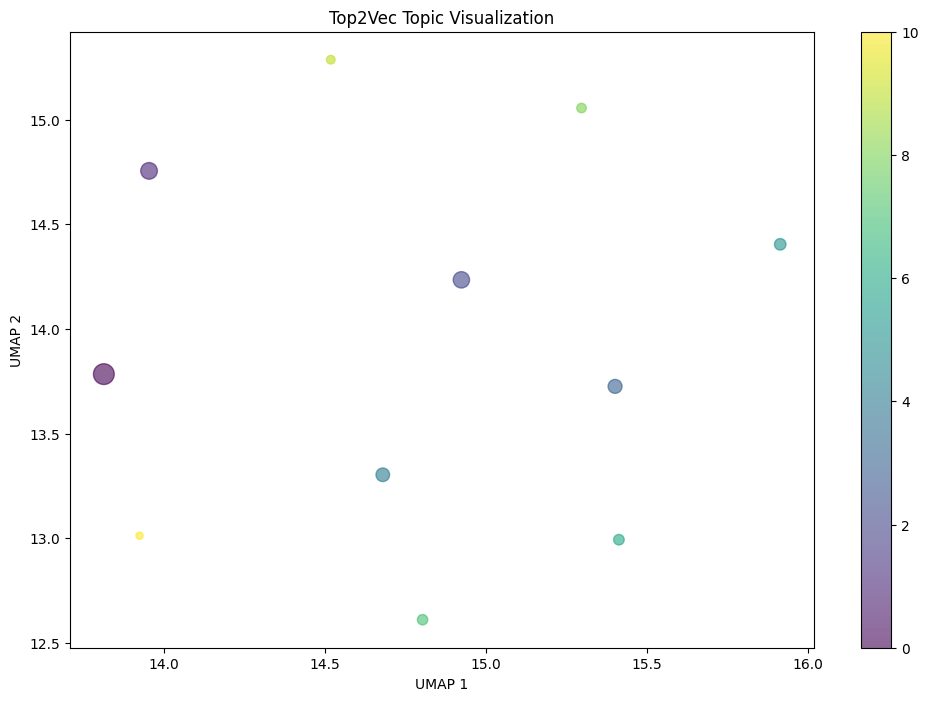

In [ ]:
# Get topic sizes and topic numbers
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()

# Get topic vectors
topic_vectors = top2vec_model.topic_vectors

# Reduce dimensions
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
embedding = umap_model.fit_transform(topic_vectors)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=topic_sizes, c=topic_nums, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Top2Vec Topic Visualization')
plt.show()


## **Organizing Documents with BERTopic**

Lastly, we discuss BERTopic, another cutting-edge approach leveraging BERT embeddings and hierarchical clustering to organize documents into a hierarchical topic tree.







In [7]:
# text data preparation
text_data = media_data['content_preprocessed'].tolist()

# Initialize BERTopic
BERTopic_model = BERTopic(language="english", verbose=True)

#  Fit the model on the dataset
topics, probabilities = BERTopic_model.fit_transform(text_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-04-28 19:34:31,082 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/300 [00:00<?, ?it/s]

2024-04-28 20:08:24,118 - BERTopic - Embedding - Completed ✓
2024-04-28 20:08:24,126 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-28 20:09:12,658 - BERTopic - Dimensionality - Completed ✓
2024-04-28 20:09:12,660 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
2024-04-28 20:09:13,130 - BERTopic - Cluster - Completed ✓
2024-04-28 20:09:13,163 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-28 20:09:22,185 - BERTopic - Representation - Completed ✓


In [8]:
# Get and display the most frequent topics
topic_freq = BERTopic_model.get_topic_freq().head(5)
print(topic_freq.head())

# Display the words associated with the first topic
topic_words = BERTopic_model.get_topic(0)
print("Topic 0 words:", topic_words)



    Topic  Count
1      -1   3161
33      0    688
5       1    436
12      2    363
64      3    265
Topic 0 words: [('geothermal', 0.04826587750611318), ('drilling', 0.011492771743253685), ('heat', 0.01123949788514353), ('energy', 0.010679015583993928), ('heating', 0.010637885063431404), ('well', 0.009927303136576065), ('resource', 0.009659225529079721), ('project', 0.009329540391506432), ('development', 0.008150390444720058), ('source', 0.007923723242157453)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 Topic 0, is the most frequent topic, it seems to center around discussions related to hydrogen-based technologies and sustainable energy solutions

Topic -1 typically indicates that some documents or content in the dataset couldn't be confidently assigned to any specific topic by the topic modeling algorithm. It's often used as a placeholder for such unclassified or noisy data.


**Coherence Score for BERTopic**

In [ ]:
# Define a function to compute coherence score for a given model
def compute_coherence_score(model, texts, dictionary, coherence='c_v'):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
    coherence_score = coherence_model.get_coherence()
    return coherence_score
BERTopic_coherence = compute_coherence_score(BERTopic_model, texts, dictionary)
print("Coherence Score for BERTopic: ", BERTopic_coherence)


A coherence score of 1.0 for BERTopic indicates that the topics generated by the model are extremely coherent. This suggests that the topics are very well-defined and the words within each topic are highly relevant and representative of a single, clear theme.

**Visualizing Topics with BERTopic**

In [11]:
#  Visualize the topics
BERTopic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The visualization is an intertopic distance map generated through topic modeling using BERTopic. It visually represents clusters of topics, where each circle denotes a topic and its size indicates the volume of associated content. The proximity of circles signifies topic similarity, with closer circles representing more similar topics. Abstract dimensions (D1, D2) reflect relationships between topics, while a highlighted central topic allows focused inspection. Users can select and explore specific topics using the sliding scale. Overall, it aids in understanding topic distribution and relationships, facilitating the identification of themes and exploration of dataset nuances.

**Generating a Bar**

In [15]:
for topic_num in top_n_topics['Topic'][1:]:  # Skip the -1 topic
    bar_chart = BERTopic_model.visualize_barchart(topics=[topic_num])
    bar_chart.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- Topic 0 - Geothermal Energy:
Words like "geothermal", "drilling", "heat", "energy", and "heating" suggest that this topic is focused on geothermal energy and the associated technologies or processes for harnessing it.
- Topic 1 - Hydrogen Energy:
The words "hydrogen", "green", "fuel", "ammonia", and "production" indicate a focus on hydrogen as a clean energy source, possibly discussing its production, usage, and role in green energy solutions.
- Topic 2 - Solar Energy Projects:
This topic seems to center on solar energy with words like "solar", "project", "mw" (megawatts), "energy", and "renewable". It likely discusses solar energy projects and their capacities or contributions to renewable energy.
- Topic 3 - Environmental Impact and Awareness:
With terms like "woman", "plastic", "spoke", "azocleantech", and "planet", this topic might be related to environmental advocacy or discussions, possibly highlighting interviews or articles from azocleantech (which seems to be a publication or an environmental organization) about plastic pollution and its impact on the planet.
- Topic 4 - Battery Technology:
The words "battery", "lithium-ion", "material", "lithium", and "electrolyte" suggest a focus on batteries, particularly lithium-ion batteries, and discussions around the materials and technology used in these energy storage solutions.

**Creating Word Clouds from BERTopic Data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



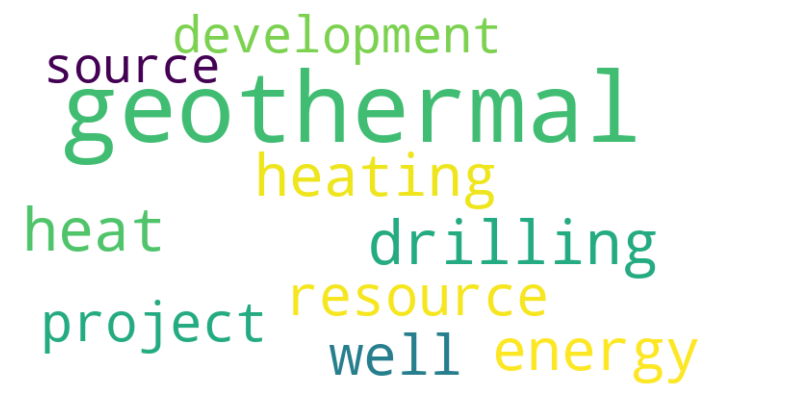

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Generate a word cloud for the first topic
topic_words = BERTopic_model.get_topic(0)  # Assuming '0' is a valid topic number

# Creating a dictionary for wordcloud function
word_freq = {word: score for word, score in topic_words}

# Create and display a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



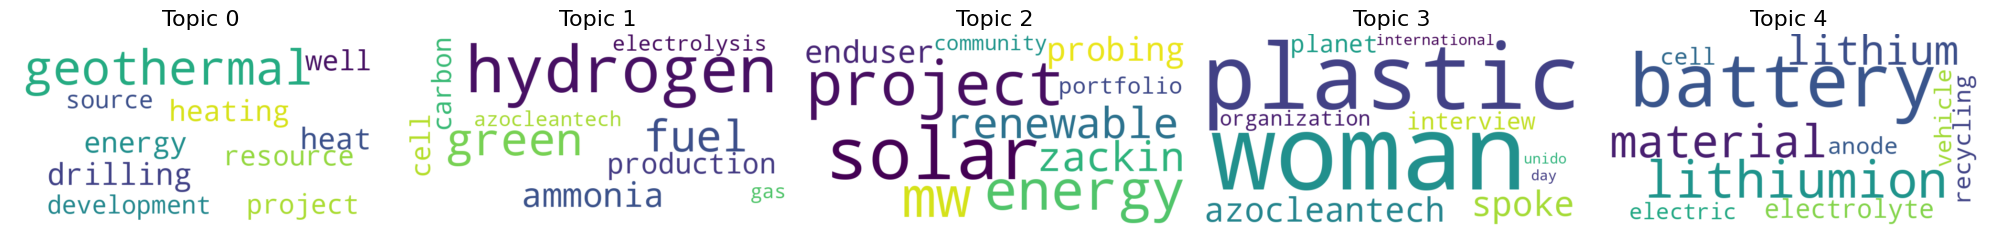

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the frequency of topics and select the top 5, excluding the outlier (-1) if present
topic_freq = BERTopic_model.get_topic_freq()
top_topics = topic_freq[topic_freq['Topic'] != -1].head(5)['Topic']  # Ensure -1 is not included

# Setting up the plot for multiple subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the size as necessary

# Generate a word cloud for each of the top 5 topics
for i, topic_num in enumerate(top_topics):
    topic_words = BERTopic_model.get_topic(topic_num)
    word_freq = {word: score for word, score in topic_words}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot each word cloud in its subplot
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Topic {topic_num}', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()


- Topic 0 - Geothermal Energy:
The word cloud reinforces the focus on geothermal energy, suggesting significant media discussion around the technology's development and deployment. This might indicate growing interest or advancements in geothermal energy exploration and utilization.
- Topic 1 - Hydrogen Energy:
The prominence of "hydrogen" and related terms like "fuel" and "green" in the word cloud confirms it as a key area of discussion, aligning with global trends emphasizing the transition to clean and sustainable energy sources, with hydrogen being a potential leader.
- Topic 2 - Solar Energy Projects:
The word cloud's focus on "solar" and "project", along with "mw" and "renewable", highlights the scale and impact of solar projects, pointing towards a narrative of investment and growth in the solar sector within the media.
- Topic 3 - Environmental Impact and Awareness:
The presence of terms like "plastic", "planet", and "woman" indicates a thematic diversity ranging from environmental conservation to possibly the inclusion and impact of women in sustainability narratives or the role of women-led initiatives in tackling environmental issues.
- Topic 4 - Battery Technology:
The word cloud for this topic, with "battery", "lithium", and "material", underscores the technical aspects of battery technology, which is a critical component of energy storage and electric vehicles. This suggests in-depth media coverage on advancements, challenges, or developments in battery technologies.

# **Evaluating Topic Coherence of all Models**



Topic coherence is a crucial metric for assessing the quality and interpretability of topics generated by various topic modeling algorithms. Here, we compute coherence scores for different models to compare their performance.

In [ ]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['LDA', 'NMF', 'Top2Vec', 'BERTopic'],
    'Coherence Score': [lda_coherence, nmf_coherence, coherence_score, BERTopic_coherence]
})

# Print the results table
print(results)


      Model                                    Coherence Score
0       LDA                                           0.502759
1       NMF  [(10, 0.8771900670645425), (15, 0.902344530464...
2   Top2Vec                                           0.916427
3  BERTopic                                                1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on the coherence scores:

- LDA: Shows lower coherence, suggesting the topics might be less distinct or meaningful.
- NMF: Demonstrates improved coherence with an increasing number of topics, indicating more specific topic formation.
- Top2Vec: Very high coherence, suggesting clear and meaningful topic delineation.
- BERTopic: Perfect coherence, indicating extremely well-defined topics.

# **Comparative Analysis of Cleantech Media and Patent Topics**



## Overview

This section provides a detailed interpretation of the topics derived from the Cleantech Media and Patent datasets using the BERTopic model. The analysis highlights the focus areas within media publications compared to the trends in recent patent filings, offering insights into the evolving landscape of Cleantech technologies.

## Media Dataset Insights

- *Topic 0 (Geothermal Energy)*
  - *Keywords*: 'geothermal', 'drilling', 'heat', 'heating', 'well', 'resource', 'project', 'development', 'source'
  - *Focus*: This topic predominantly covers geothermal energy, highlighting advancements in drilling technologies, heating solutions, and the development of geothermal resources. It reflects a significant media interest in promoting geothermal energy as a sustainable and viable energy solution.

## Patent Dataset Insights

- *Topic 0 (Hydropower)*
  - *Keywords*: 'hydropower', 'station', 'water', 'level', 'conservancy', 'method', 'dam', 'flow', 'construction', 'gate'
  - *Focus*: Focuses on hydropower, detailing technologies related to water management, dam construction, and energy generation methods. The emphasis is on optimizing and enhancing established hydropower technologies.

## Comparative Insights

- *Emerging Trends vs. Established Technologies*: While media discussions highlight emerging technologies like geothermal energy, patent filings continue to focus on refining established solutions such as hydropower.
- *Sustainability Focus*: Both datasets emphasize sustainability, albeit from different perspectives—media explores potential and innovation in newer technologies, whereas patents focus on improving the efficacy and application of existing solutions.
- *Technical Depth*: Patents demonstrate a deeper technical focus, with specific terminology related to practical implementations and optimizations. Media coverage, on the other hand, tends to discuss broader concepts and the strategic importance of technologies.

## Conclusion

The analysis underscores the distinct roles that media and patents play in the Cleantech ecosystem. Media outlets serve as a platform for discussing potential and emerging technologies, aiming to generate interest and foster dialogue. In contrast, patents document concrete innovations and technical solutions, reflecting ongoing efforts to advance and perfect existing technologies. This divergence highlights the complementary nature of media and patents in driving forward the agenda of sustainable technological advancement.